In [61]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [20]:
sys.path.append(os.path.abspath('../scripts'))

In [34]:
from load_data import *
from task11 import *

In [22]:

df = pd.read_excel('../data/Week2_challenge_data_source.xlsx')



In [23]:
df.head()
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [24]:
# Start by identifying the top 10 handsets used by the customers.
top_10_handset = df['Handset Type'].value_counts().head(10)
print(top_10_handset)

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [25]:
# Then, identify the top 3 handset manufacturers
top_3_handset_manufacturer = df['Handset Manufacturer'].value_counts().head(3)
print(top_3_handset_manufacturer)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [26]:
# Next, identify the top 5 handsets per top 3 handset manufacturer
for h_manfacturer in top_3_handset_manufacturer.index:
    print(h_manfacturer)
    print(df[df['Handset Manufacturer'] == h_manfacturer]['Handset Type'].value_counts().head(1))
    print('\n')

Apple
Handset Type
Apple iPhone 6S (A1688)    9419
Name: count, dtype: int64


Samsung
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Name: count, dtype: int64


Huawei
Handset Type
Huawei B528S-23A    19752
Name: count, dtype: int64




In [32]:
numeric_columns = df.select_dtypes(include=[np.number])

df[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())
df.head(10)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,13114483499779198976,2019-04-12 21:37:31,439.0,2019-04-25 08:08:09,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,...,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,13114483501243799552,2019-04-13 08:41:59,612.0,2019-04-25 08:16:21,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9164567010589190,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
7,13042425910865399808,2019-04-14 02:11:59,592.0,2019-04-25 02:26:52,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
8,13114483506432499712,2019-04-14 12:48:32,121.0,2019-04-25 10:22:26,960.0,941634.0,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,18436641.0,10860867.0,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0
9,13042425914669299712,2019-04-15 00:32:15,0.0,2019-04-25 00:40:17,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


In [53]:
# Apply outlier replacement function to numeric columns only
for column in numeric_columns.columns:
    df[column] = replace_outliers_with_mean(df[column])

df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Data (Bytes),Duration Decile
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,104608.560347,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,345629377.0,3
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,104608.560347,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,707185356.0,3
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,104608.560347,2.082016e+14,3.388159e+10,3.528151e+13,D42335A,...,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,307690973.0,3
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,104608.560347,2.082014e+14,3.388159e+10,3.535661e+13,T21824A,...,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,889352748.0,3
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,104608.560347,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,607681403.0,3


In [39]:
# 7. User segmentation based on total session duration and total data usage (DL + UL)
df['Total Data (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
df.head(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Data (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,104608.560347,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,345629377.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,104608.560347,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,707185356.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,104608.560347,2.082016e+14,3.501433e+10,3.528151e+13,D42335A,...,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,307690973.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,104608.560347,2.082014e+14,3.501433e+10,3.535661e+13,T21824A,...,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,889352748.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,104608.560347,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,607681403.0
5,13114483499779198976,2019-04-12 21:37:31,439.0,2019-04-25 08:08:09,553.0,104608.560347,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,...,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0,784759966.0
6,13114483501243799552,2019-04-13 08:41:59,612.0,2019-04-25 08:16:21,168.0,104608.560347,2.082014e+14,3.366537e+10,8.676270e+13,9164567010589190,...,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0,118487293.0
7,13042425910865399808,2019-04-14 02:11:59,592.0,2019-04-25 02:26:52,512.0,104608.560347,2.082010e+14,3.501433e+10,8.654640e+13,CELL_208_20_520025_1,...,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0,834163359.0
8,13114483506432499712,2019-04-14 12:48:32,121.0,2019-04-25 10:22:26,960.0,104608.560347,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,10860867.0,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0,903975407.0
9,13042425914669299712,2019-04-15 00:32:15,0.0,2019-04-25 00:40:17,284.0,104608.560347,2.082016e+14,3.365922e+10,3.557311e+13,L20434C,...,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0,872988322.0


In [41]:
# Segmentation into 5 decile classes based on session duration
df['Duration Decile'] = pd.qcut(df['Dur. (ms)'], 5, labels=False)
df.head(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Data (Bytes),Duration Decile
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,104608.560347,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,345629377.0,3
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,104608.560347,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,707185356.0,3
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,104608.560347,2.082016e+14,3.501433e+10,3.528151e+13,D42335A,...,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,307690973.0,3
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,104608.560347,2.082014e+14,3.501433e+10,3.535661e+13,T21824A,...,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,889352748.0,3
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,104608.560347,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,607681403.0,3
5,13114483499779198976,2019-04-12 21:37:31,439.0,2019-04-25 08:08:09,553.0,104608.560347,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,...,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0,784759966.0,3
6,13114483501243799552,2019-04-13 08:41:59,612.0,2019-04-25 08:16:21,168.0,104608.560347,2.082014e+14,3.366537e+10,8.676270e+13,9164567010589190,...,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0,118487293.0,3
7,13042425910865399808,2019-04-14 02:11:59,592.0,2019-04-25 02:26:52,512.0,104608.560347,2.082010e+14,3.501433e+10,8.654640e+13,CELL_208_20_520025_1,...,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0,834163359.0,3
8,13114483506432499712,2019-04-14 12:48:32,121.0,2019-04-25 10:22:26,960.0,104608.560347,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0,903975407.0,3
9,13042425914669299712,2019-04-15 00:32:15,0.0,2019-04-25 00:40:17,284.0,104608.560347,2.082016e+14,3.365922e+10,3.557311e+13,L20434C,...,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0,872988322.0,3


In [43]:
# Aggregate data volume per decile class
decile_data = df.groupby('Duration Decile')['Total Data (Bytes)'].sum().reset_index()
print(decile_data)




   Duration Decile  Total Data (Bytes)
0                0        1.488421e+13
1                1        2.361982e+13
2                2        6.089117e+12
3                3        1.487667e+13
4                4        1.489496e+13


In [45]:
# 8. Descriptive statistics of key variables
desc_stats = df[['Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']].describe()
print(desc_stats)

           Dur. (ms)  Avg RTT DL (ms)  Avg RTT UL (ms)  Total DL (Bytes)  \
count  150001.000000    150001.000000    150001.000000      1.500010e+05   
mean    89299.305353        67.089326        10.721812      4.546434e+08   
std     44152.757685        39.123157         8.741881      2.441421e+08   
min      7142.000000         0.000000         0.000000      7.114041e+06   
25%     57442.000000        35.000000         3.000000      2.431072e+08   
50%     86399.000000        54.000000         7.000000      4.558409e+08   
75%    107435.000000       109.795706        17.662883      6.657051e+08   
max    205676.000000       221.000000        39.000000      9.029696e+08   

       Total UL (Bytes)  
count      1.500010e+05  
mean       4.111845e+07  
std        1.119178e+07  
min        9.616000e+06  
25%        3.325230e+07  
50%        4.112121e+07  
75%        4.900188e+07  
max        7.263407e+07  


In [57]:
# Calculate dispersion metrics for key variables


def dispersion_metrics(column):
    mean = column.mean()
    median = column.median()
    variance = column.var()
    std_dev = column.std()
    return {'Mean': mean, 'Median': median, 'Variance': variance, 'Std Dev': std_dev}

metrics = {}
for column in ['Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']:
    metrics[column] = dispersion_metrics(df[column])


print(metrics)

{'Dur. (ms)': {'Mean': 86897.529456203, 'Median': 86399.0, 'Variance': 1696391409.7117312, 'Std Dev': 41187.2724237929}, 'Avg RTT DL (ms)': {'Mean': 67.0893258251146, 'Median': 54.0, 'Variance': 1530.6214169525035, 'Std Dev': 39.12315704224933}, 'Avg RTT UL (ms)': {'Mean': 10.721811678877408, 'Median': 7.0, 'Variance': 76.42048005847862, 'Std Dev': 8.741880807839845}, 'Total DL (Bytes)': {'Mean': 454643430.0789667, 'Median': 455840911.0, 'Variance': 5.9605345737092744e+16, 'Std Dev': 244142060.56534532}, 'Total UL (Bytes)': {'Mean': 41118450.96348521, 'Median': 41121206.292106666, 'Variance': 125242722221953.05, 'Std Dev': 11191189.490932278}}


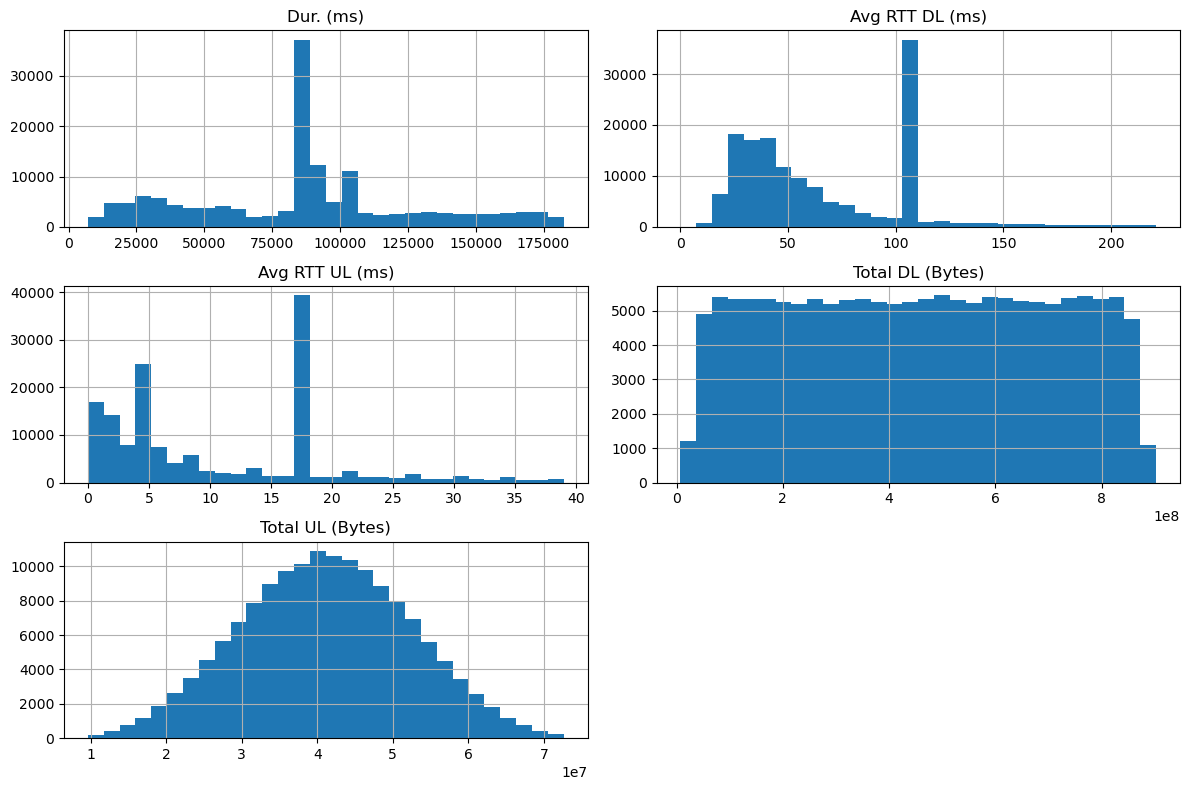

In [59]:
# 10. Graphical Univariate Analysis
# Histograms for each key variable
df[['Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()


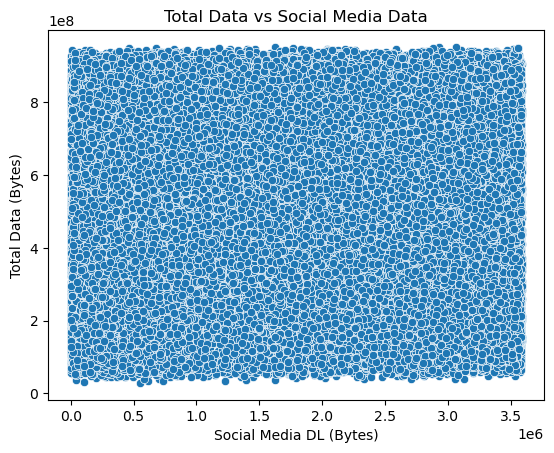

In [63]:
# 11. Bivariate Analysis
# Scatter plot of Total Data vs Social Media Data
sns.scatterplot(x='Social Media DL (Bytes)', y='Total Data (Bytes)', data=df)
plt.title('Total Data vs Social Media Data')
plt.show()

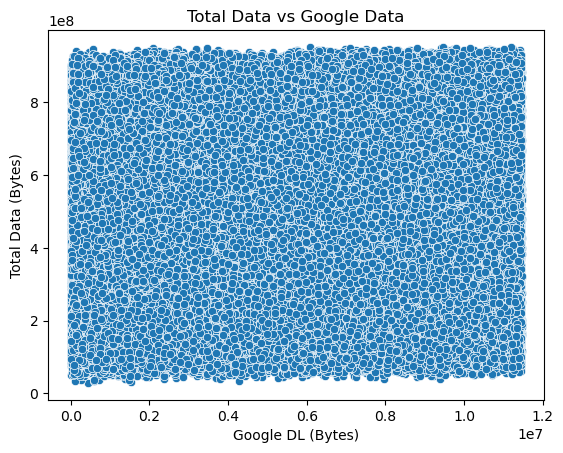

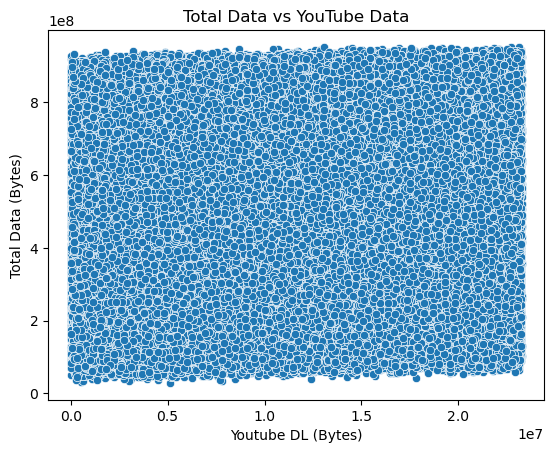

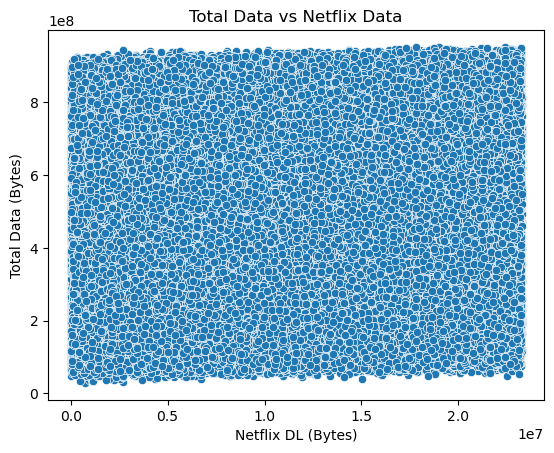

In [66]:
sns.scatterplot(x='Google DL (Bytes)', y='Total Data (Bytes)', data=df)
plt.title('Total Data vs Google Data')
plt.show()

sns.scatterplot(x='Youtube DL (Bytes)', y='Total Data (Bytes)', data=df)
plt.title('Total Data vs YouTube Data')
plt.show()

sns.scatterplot(x='Netflix DL (Bytes)', y='Total Data (Bytes)', data=df)
plt.title('Total Data vs Netflix Data')
plt.show()

In [70]:
# 12. Correlation Matrix for apps data
app_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Youtube DL (Bytes)', 
               'Netflix DL (Bytes)', 'Email DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
corr_matrix = df[app_columns].corr()

print(corr_matrix.head(10))

                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000          -0.001954   
Google DL (Bytes)                      -0.001954           1.000000   
Youtube DL (Bytes)                     -0.001389           0.001760   
Netflix DL (Bytes)                     -0.001817           0.000548   
Email DL (Bytes)                        0.004745          -0.000039   
Gaming DL (Bytes)                       0.001018          -0.001421   
Other DL (Bytes)                        0.006126          -0.002557   

                         Youtube DL (Bytes)  Netflix DL (Bytes)  \
Social Media DL (Bytes)           -0.001389           -0.001817   
Google DL (Bytes)                  0.001760            0.000548   
Youtube DL (Bytes)                 1.000000            0.001202   
Netflix DL (Bytes)                 0.001202            1.000000   
Email DL (Bytes)                   0.001679            0.001351   
Gaming DL (Bytes)            

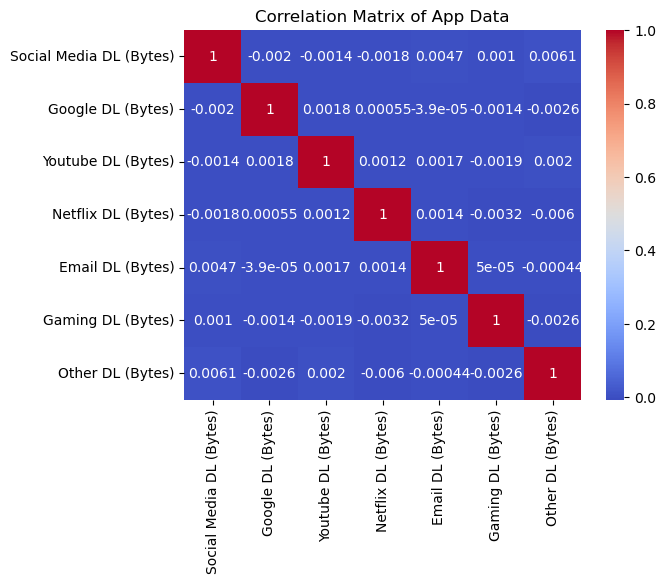

In [71]:
# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of App Data')
plt.show()

In [73]:
# 13. Principal Component Analysis (PCA)
# Perform PCA to reduce dimensionality of app usage data
pca = PCA(n_components=2)
app_data = df[app_columns].fillna(0)  # Handle missing values before PCA
pca_result = pca.fit_transform(app_data)

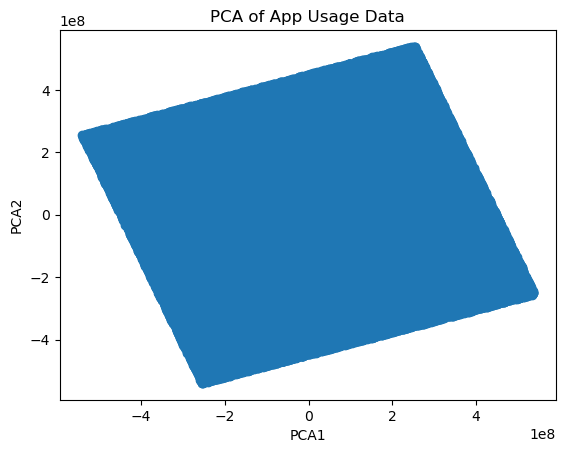

In [74]:
# Add PCA results back to the DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Visualize PCA results
plt.scatter(df['PCA1'], df['PCA2'])
plt.title('PCA of App Usage Data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [75]:
# Interpretation of PCA results:
# 1. The first principal component (PCA1) captures the largest variance in app usage data.
# 2. The second principal component (PCA2) shows additional variance orthogonal to PCA1.
# 3. Apps like Social Media and YouTube tend to contribute more to the first principal component.
# 4. PCA helps reduce dimensionality while retaining the most relevant features of user behavior.